In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
%matplotlib inline

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
features = train.drop(["ID_code","target"], axis=1).columns.tolist()

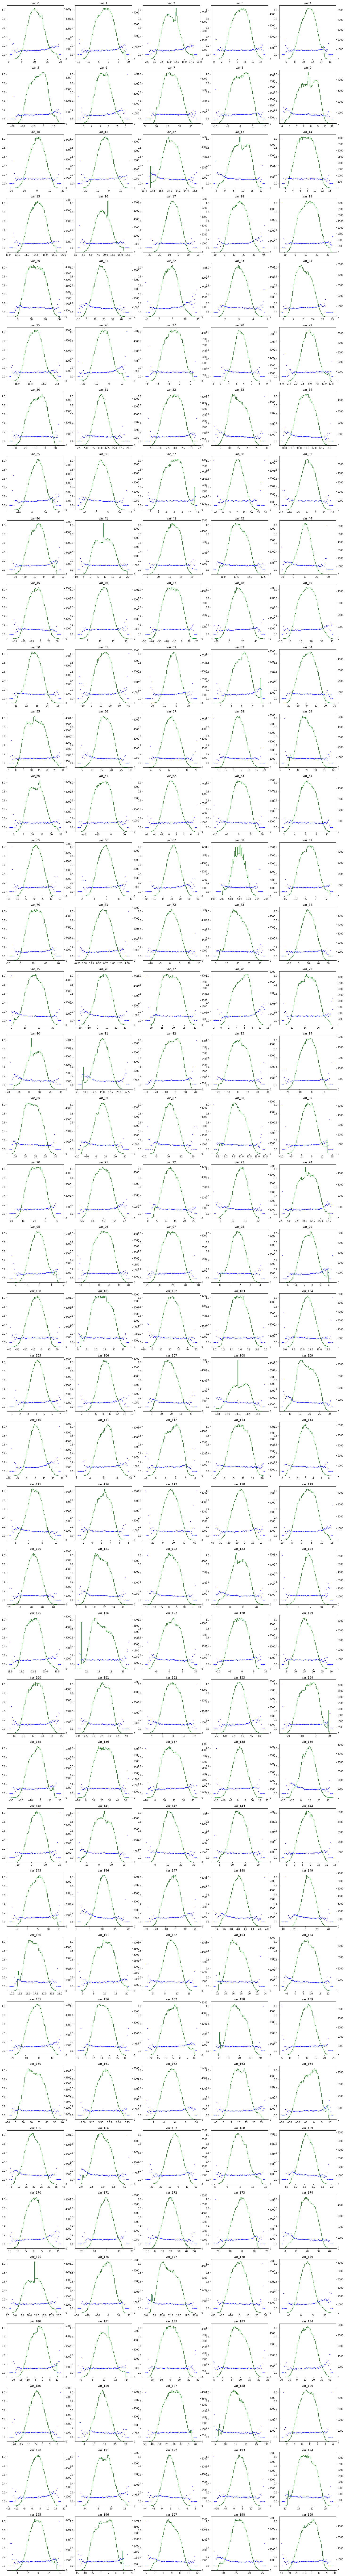

In [3]:
var_count = 200
cols = 5
rows = var_count//cols + 0 if var_count % cols == 0 else 1
hist_bins = 100

f, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

for i, feat in enumerate(features[:var_count]):
    # fix histogram range
    range_min = train[feat].min()
    range_max = train[feat].max()
    train_counts, train_values = np.histogram(train[feat].values, bins=hist_bins, range=(range_min,range_max))
    target1_counts, target1_values = np.histogram(train[train["target"]==1][feat].values, bins=hist_bins, range=(range_min,range_max))
    # target=1 rate
    rate_list = list()
    for t_v, t_c in zip(train_values, train_counts):
        if t_c == 0:
            rate_list.append(0)
        elif t_v in target1_values:
            rate_list.append(target1_counts[np.where(target1_values==t_v)[0][0]] / t_c)
        else:
            rate_list.append(0)
    # plot
    ax = axes[i //5,i % 5]
    ax.set_title(feat)
    ax.set_ylim(-0.1, 1.1)
    ax.scatter(train_values[:-1], rate_list, s=2, c="b")
    ax2 = ax.twinx()
    ax2.hist(train[feat].values, bins=hist_bins, color="g", histtype="step")